# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_df = "../Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
### Begin Data Retrieval ###
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
maxTemp_list = []
windSpeed_list = []
city_id = []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        data = requests.get(query_url+city).json()
        city_list.append(data['name'])
        city = data['name'] 
        cloudiness_list.append(data['clouds']['all'])
        country_list.append(data['sys']['country'])
        date_list.append(data['dt'])
        humidity_list.append(data['main']['humidity'])
        lat_list.append(data['coord']['lat'])
        lng_list.append(data['coord']['lon'])
        maxTemp_list.append(data['main']['temp_max'])
        windSpeed_list.append(data['wind']['speed'])
        counter +=1
        cityID = counter - 1
        city_id.append(cityID)
        print(f"Processing Record {counter} | {city}")
    except:
        print(f"City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Kuandian
Processing Record 2 | Etah
Processing Record 3 | Belmonte
City not found. Skipping...
Processing Record 4 | Kānker
Processing Record 5 | Saint-Paul-lès-Dax
Processing Record 6 | Punta Arenas
City not found. Skipping...
Processing Record 7 | Butaritari
Processing Record 8 | Mataura
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | Harrisburg
Processing Record 10 | Hermanus
Processing Record 11 | Mar del Plata
Processing Record 12 | Ulladulla
Processing Record 13 | Ilulissat
Processing Record 14 | Cape Town
Processing Record 15 | Zhangaözen
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | Plácido de Castro
Processing Record 17 | Kapaa
Processing Record 18 | Caravelas
City not found. Skipping...
Processing Record 19 | Brae
Processing Record 20 | East London
Processing Record 21 | Kodinsk
Processing Record 22 | Jega
Processing Record 23 | Waseca
Pr

Processing Record 225 | Lavrentiya
Processing Record 226 | Turaif
City not found. Skipping...
Processing Record 227 | Aksu
Processing Record 228 | Luanda
Processing Record 229 | Kurumkan
Processing Record 230 | Tiksi
Processing Record 231 | Baymak
Processing Record 232 | San Quintín
Processing Record 233 | Kavaratti
Processing Record 234 | Saint Anthony
Processing Record 235 | Kawalu
Processing Record 236 | Ostrovnoy
Processing Record 237 | Erenhot
City not found. Skipping...
Processing Record 238 | Yining
Processing Record 239 | Kargasok
Processing Record 240 | San Jose
Processing Record 241 | Corpus Christi
Processing Record 242 | Kendari
Processing Record 243 | Port Elizabeth
Processing Record 244 | Voznesen'ye
Processing Record 245 | Kondinskoye
Processing Record 246 | Coquimbo
Processing Record 247 | Rock Falls
Processing Record 248 | Iralaya
Processing Record 249 | Kidal
Processing Record 250 | Praia
Processing Record 251 | Nome
Processing Record 252 | Pedernales
Processing Recor

Processing Record 451 | Duku
Processing Record 452 | Tokur
Processing Record 453 | Vung Tau
City not found. Skipping...
Processing Record 454 | Svetlaya
Processing Record 455 | Aswān
Processing Record 456 | Riyadh
Processing Record 457 | Annau
Processing Record 458 | Dongsheng
Processing Record 459 | Grandview
Processing Record 460 | Progreso
Processing Record 461 | Oktyabr'skiy
Processing Record 462 | Kefamenanu
Processing Record 463 | Samsun Province
Processing Record 464 | Indramayu
Processing Record 465 | Baisha
Processing Record 466 | Porto-Novo
Processing Record 467 | Bartlesville
Processing Record 468 | Bolkhov
Processing Record 469 | Hofn
Processing Record 470 | Jiuquan
Processing Record 471 | Snyder
Processing Record 472 | Treinta y Tres
Processing Record 473 | Tiznit Province
Processing Record 474 | Dhidhdhoo
Processing Record 475 | Assiut
Processing Record 476 | Marsá Maţrūḩ
Processing Record 477 | Camacha
Processing Record 478 | Port Lincoln
Processing Record 479 | Māndal
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {'City ID':city_id,
             'City':city_list,
             'Lat':lat_list,
             'Lng':lng_list,
             'Max Temp':maxTemp_list,
             'Humidity':humidity_list,
             'Cloudiness':cloudiness_list,
             'Wind Speed':windSpeed_list,
             'Country':country_list,
             'Date':date_list
            }
city_df = pd.DataFrame(city_dict)
city_df.to_csv('../Output_data/cities.csv', index=False)
city_df.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Kuandian,40.7286,124.7847,303.58,61,80,2.56,CN,1627101794
1,1,Etah,27.6333,78.6667,308.83,48,64,3.68,IN,1627101794
2,2,Belmonte,-15.8631,-38.8828,292.43,77,100,4.69,BR,1627101794
3,3,Kānker,20.2719,81.4931,296.62,92,100,4.27,IN,1627101795
4,4,Saint-Paul-lès-Dax,43.7272,-1.0516,290.19,97,10,1.03,FR,1627101795


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df.describe()
# Max humidity is 100. As a result, no further cities need to be dropped.

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,283.500000,22.068384,17.484299,294.446585,70.297535,51.670775,3.674947,1.627102e+09
std,164.111751,32.017030,89.882378,7.794952,19.849732,39.010093,2.738550,1.696739e+02
min,0.000000,-54.800000,-179.166700,270.810000,9.000000,0.000000,0.000000,1.627101e+09
25%,141.750000,-3.863775,-64.573625,288.920000,56.000000,7.000000,1.757500,1.627102e+09
50%,283.500000,26.645750,24.664450,295.620000,74.000000,59.000000,3.090000,1.627102e+09
75%,425.250000,47.845575,100.509425,300.770000,86.000000,90.000000,4.802500,1.627102e+09
max,567.000000,78.218600,179.316700,311.240000,100.000000,100.000000,16.710000,1.627102e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

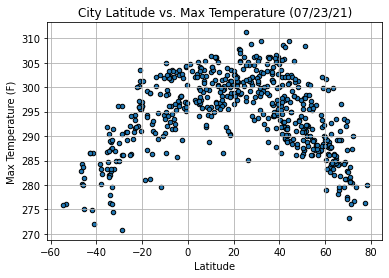

This scatter plot illustrates that the max temperature increases as it nears latitude 20, which creates a 'U-shaped' plot. Latitude 20 to 40 is the range with highest temperatures.


In [31]:
x = ['Lat']
y = ['Max Temp']
city_df.plot.scatter(x,y, 
                     edgecolor='black', 
                     grid=True, 
                     xlabel='Latitude',
                     ylabel='Max Temperature (F)',
                     title='City Latitude vs. Max Temperature (07/23/21)')
plt.show()
print("This scatter plot illustrates that the max temperature increases as it nears latitude 20, which creates a 'U-shaped' plot. Latitude 20 to 40 is the range with highest temperatures.")

## Latitude vs. Humidity Plot

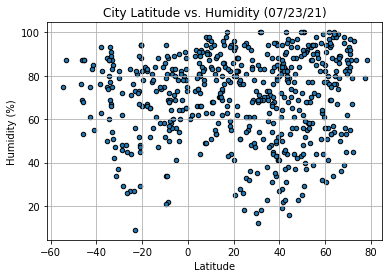

This scatter plot has no defining trend among the points. However, there seems to be more clusters of points with higher humidity and latitude.


In [34]:
x = ['Lat']
y = ['Humidity']
city_df.plot.scatter(x,y, 
                     edgecolor='black', 
                     grid=True, 
                     xlabel='Latitude',
                     ylabel='Humidity (%)',
                     title='City Latitude vs. Humidity (07/23/21)')
plt.show()
print("This scatter plot has no defining trend among the points. However, there seems to be more clusters of points with higher humidity and latitude.")

## Latitude vs. Cloudiness Plot

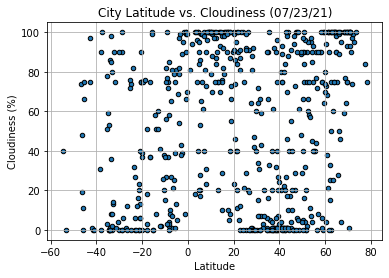

This scatter plot shows that there are clusters of cities with very high and low cloudiness, irrespective of the latitude. 


In [38]:
x = ['Lat']
y = ['Cloudiness']
city_df.plot.scatter(x,y, 
                     edgecolor='black', 
                     grid=True, 
                     xlabel='Latitude',
                     ylabel='Cloudiness (%)',
                     title='City Latitude vs. Cloudiness (07/23/21)')
plt.show()
print("This scatter plot shows that there are clusters of cities with very high and low cloudiness, irrespective of the latitude. ")

## Latitude vs. Wind Speed Plot

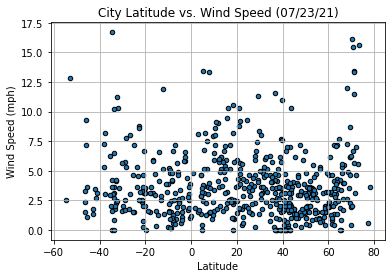

This scatter plot shows that wind speed is relatively the same across all latitudes from 0 to 7.5 mph.


In [39]:
x = ['Lat']
y = ['Wind Speed']
city_df.plot.scatter(x,y, 
                     edgecolor='black', 
                     grid=True, 
                     xlabel='Latitude',
                     ylabel='Wind Speed (mph)',
                     title='City Latitude vs. Wind Speed (07/23/21)')
plt.show()
print("This scatter plot shows that wind speed is relatively the same across all latitudes from 0 to 7.5 mph.")

## Linear Regression

The r-value is -0.03


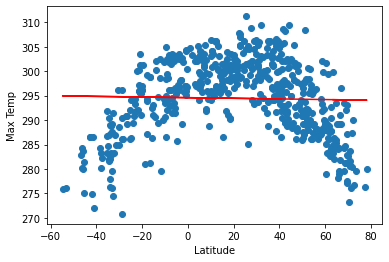

In [54]:
corr = round(x.corr(y),2)
print(f"The r-value is {corr}")
x = city_df['Lat']
y = city_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression